# MONDAY

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
file= pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [31]:

file1=file.drop(columns=['total_claim_amount'])

In [32]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [34]:
print(file1['vehicle_size'].apply(type).value_counts())

<class 'str'>    10689
Name: vehicle_size, dtype: int64


In [35]:
# Create a data frame only with the columns that have numeric values
numerical = file1.select_dtypes(include='number')

categorical = file1.select_dtypes(exclude='number')

In [36]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
dtypes: int64(7)
memory usage: 584.7 KB


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

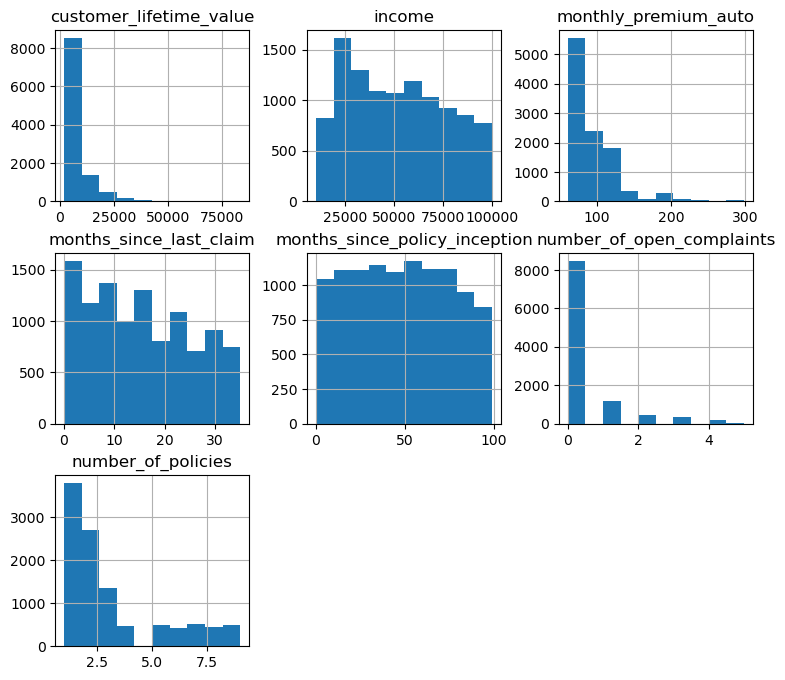

In [37]:
file1.hist(figsize=(9,8))

<AxesSubplot:>

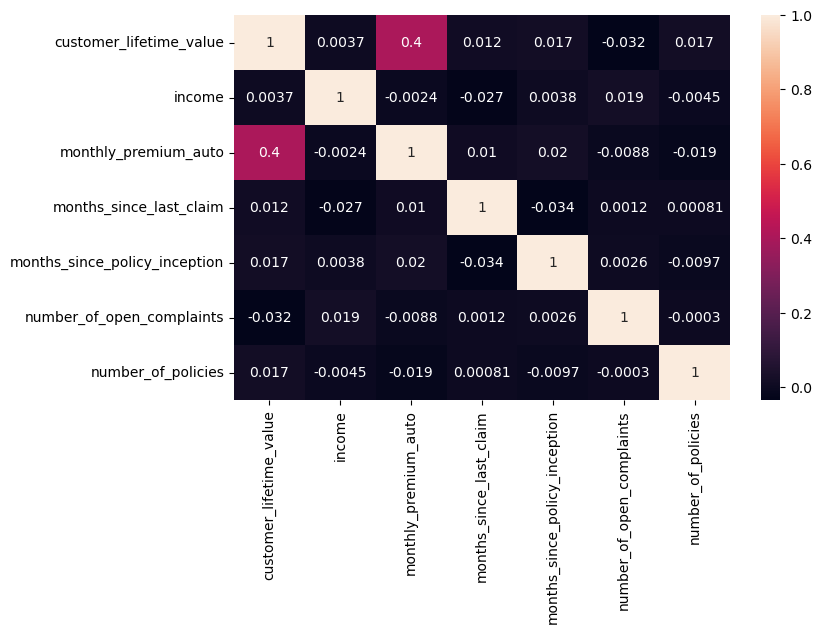

In [40]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(numerical.corr(),annot=True)

In [41]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
corr_matrix.drop(corr_matrix.columns[to_drop], axis=1)

NameError: name 'upper' is not defined

In [42]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

In [43]:
from sklearn.preprocessing import OneHotEncoder 

In [44]:
import pandas as pd
one_hot_nominal = pd.get_dummies(categorical, columns=['region','response','employment_status','gender','location_code','marital_status','marital_status','policy_type','sales_channel','policy','renew_offer_type','vehicle_class'], drop_first = True)

In [45]:
unique_coverage = categorical['coverage'].unique()
unique_coverage

array(['basic', 'extended', 'premium'], dtype=object)

In [46]:
def replacer(col_name,old_vals,new_vals):
    for i in range(len(old_vals)):
        categorical.loc[categorical[col_name] == old_vals[i], col_name] = new_vals[i]
    
    return categorical[col_name]

In [47]:
categorical.month.unique()

array(['feb', 'jan'], dtype=object)

In [48]:
ordinals = pd.DataFrame()

In [49]:
ordinals['coverage']=replacer('coverage',list(categorical.coverage.unique()), [0,1,2] )

In [50]:
ordinals['education'] = replacer('education', list(categorical.education.unique()), [1,2,0,4,3])

In [51]:
ordinals['month'] = replacer('month', list(categorical.month.unique()), [0,1])

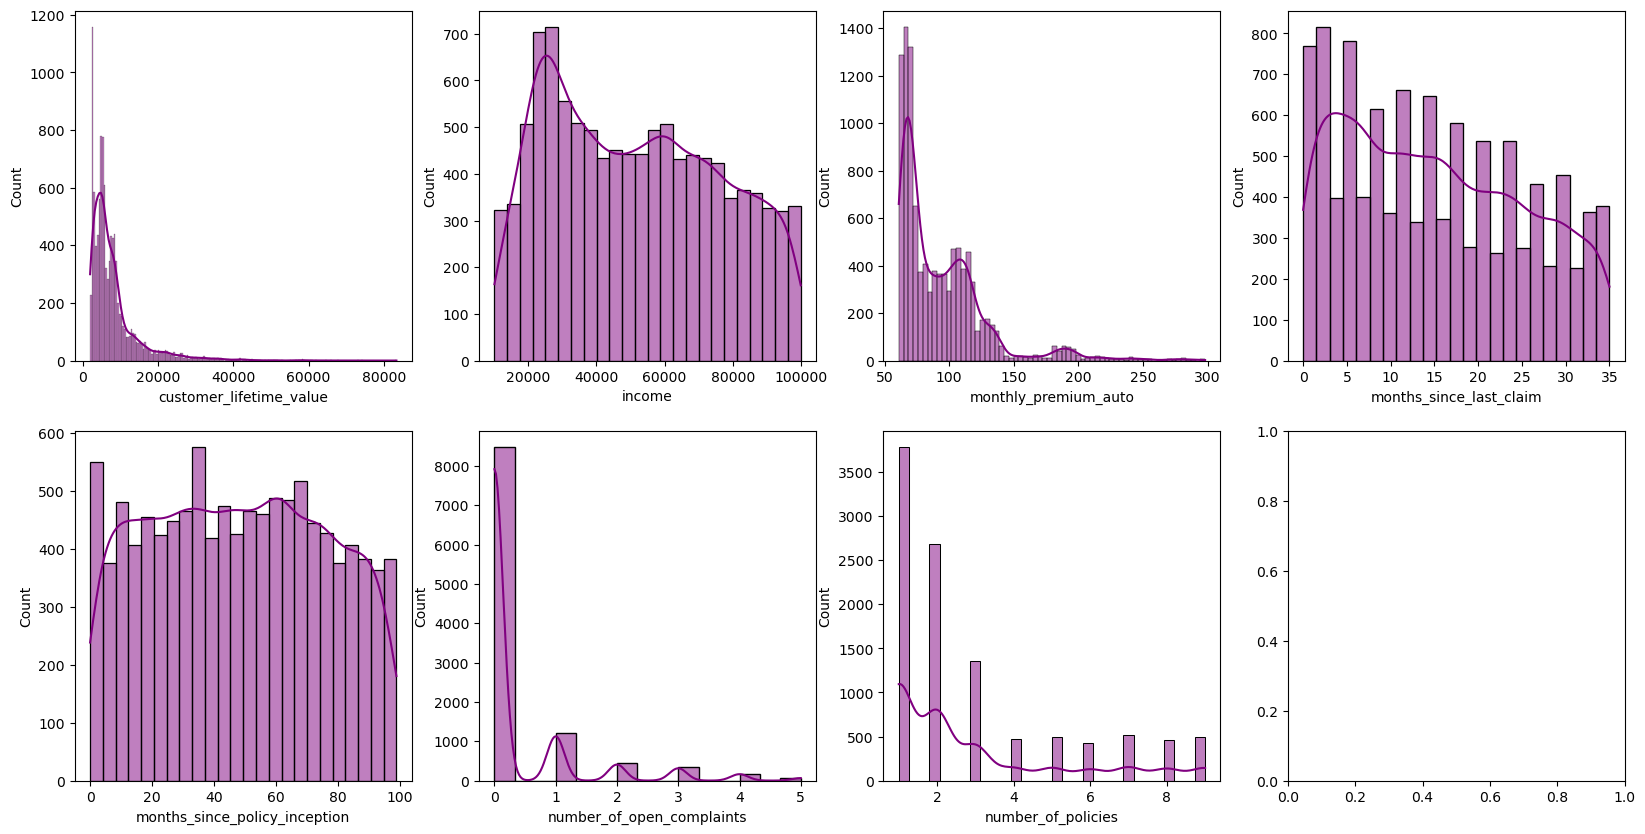

In [52]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

sns.set_palette('pastel')
for i, col in enumerate(numerical):
    sns.histplot(data=numerical, x=col, color="purple", kde=True, ax=axs[i//4, i%4])
plt.show()

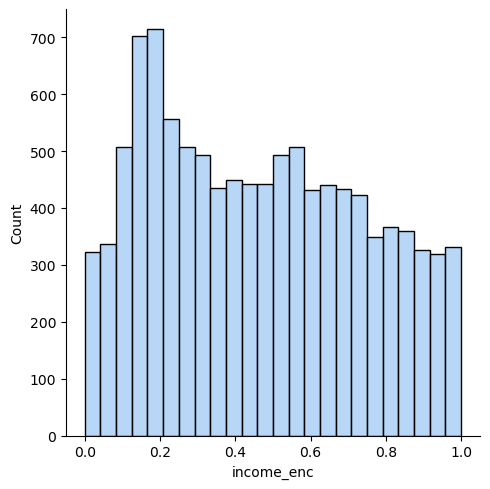

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(numerical[['income']])
numerical['income_enc']=scaler.transform(numerical[['income']])
sns.displot(numerical['income_enc'])
